# Classes from `biostrings` module
## `StoichMat()`
Transform an input stoichiometric matrix into an ODE system equations representing chemical reactions, solve and plot it.

In [4]:
import pandas as pd
import numpy as np
import os
curdir = os.path.abspath(os.getcwd())
os.chdir('..')
from src.modeling import *
os.chdir(curdir)

### Toy example

In [40]:
# prepare input
np.random.seed(10)
## stoichiometric matrix
stoichmat = np.array([
                        [-2,0,-2,0],
                        [1,1,0,-1],
                        [0,-1,0,0],
                        [0,0,2,0],
                        [0,0,0,1]
                    ])
## reaction rates
ratesvec = np.random.rand(stoichmat.shape[1],1)
## initial concentration
c0 = np.random.rand(stoichmat.shape[0])

In [41]:
# compute ODE
## time points
t = np.linspace(0,20)
## solve ODE
y = odeint(StoichMat().computeODE, c0, t, args=(stoichmat, ratesvec))

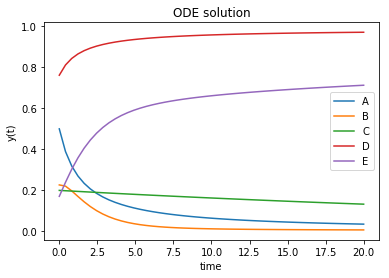

In [42]:
# plot
StoichMat().plotSolODE(t, y, labels=['A','B','C','D','E'])

### Core *E. coli* metabolism
Source: [Orth *et al.* 2009](https://www.asmscience.org/content/journal/ecosalplus/10.1128/ecosalplus.10.2.1#backarticlefulltext)

In [100]:
core_model = pd.read_excel('data/modeling/ecoli_core_model.xls')
core_model.head()

,METABOLITE / ABBREVIATION,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,13dpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2pg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3pg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6pgc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6pgl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
stoichmat = np.array(core_model.iloc[:,1:])
metaboliteNames = core_model.iloc[:,0]

In [102]:
## reaction rates
ratesvec = np.random.rand(stoichmat.shape[1],1)
## initial concentration
c0 = np.random.rand(stoichmat.shape[0],)

# compute ODE
## time points
t = np.linspace(0,20)
## solve ODE
y = odeint(StoichMat().computeODE, c0, t, args=(stoichmat, ratesvec))

E:\Documents\projectes\compybio\src\modeling.py:60: RuntimeWarning: invalid value encountered in power
  velocities = ratesvec.T * np.prod(conc**rxalphas,axis=0)


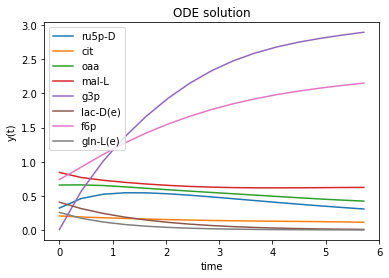

In [107]:
# plot
np.random.seed(123)
nMetabs = 8
idxMetabs = np.random.randint(0,len(metaboliteNames),size = nMetabs)

StoichMat().plotSolODE(t, y[:,idxMetabs], labels= list(metaboliteNames[idxMetabs]))